In [1]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_context("talk")
sns.set_style("white")

In [17]:
df = pd.read_csv("incidence_curves.csv")

Text(0.5, 0, 'Day')

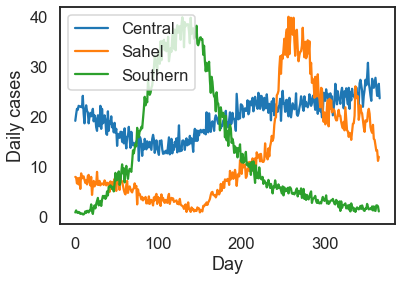

In [18]:
for a, sdf in df.groupby("archetype"):
    plt.plot(sdf["day"], sdf["cases"],label=a)
plt.legend()
plt.ylabel("Daily cases")
plt.xlabel("Day")

In [16]:
df[df["archetype"]==" "]

,archetype,day,cases
365,,1,0.9


In [48]:
def pad_and_smooth(df_archetype):
    pad1 = df_archetype.copy()
    pad2 = df_archetype.copy()
    pad3 = df_archetype.copy()
    pad2["day"] += 365
    pad3["day"] += 365*2
    padded = pd.concat([pad1, pad2, pad3], ignore_index=True)
    
    # df_return = pad1.copy()
    # df_return["cases"] = padded["cases"].rolling(7).mean()[365:].reset_index(drop=True)
    # return df_return
    # return padded
    return padded["cases"].rolling(7).mean()[365:365*2].reset_index(drop=True)

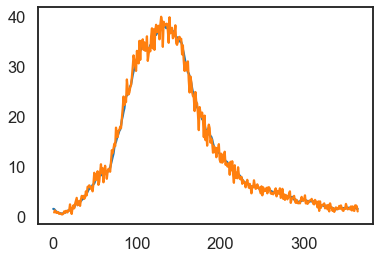

In [55]:
a = "Southern"
sdf = df[df["archetype"]==a]
foo = pad_and_smooth(sdf)
df_south = pd.DataFrame({"day": np.arange(365), "cases": foo})
plt.plot(foo)
plt.plot(sdf["day"],sdf["cases"])

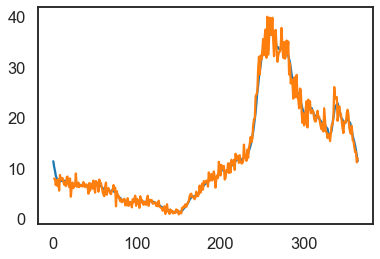

In [57]:
a = "Sahel"
sdf = df[df["archetype"]==a]
foo = pad_and_smooth(sdf)
df_sahel = pd.DataFrame({"day": np.arange(365), "cases": foo})
plt.plot(foo)
plt.plot(sdf["day"],sdf["cases"])

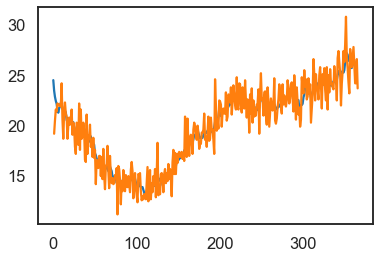

In [58]:
a = "Central"
sdf = df[df["archetype"]==a]
foo = pad_and_smooth(sdf)
df_central = pd.DataFrame({"day": np.arange(365), "cases": foo})
plt.plot(foo)
plt.plot(sdf["day"],sdf["cases"])

In [61]:
df_south["archetype"] = "Southern"
df_central["archetype"] = "Central"
df_sahel["archetype"] = "Sahel"

df_save = pd.concat([df_south, df_central, df_sahel], ignore_index=True)
df_save.to_csv("incidence_curves_smoothed.csv", index=False)

Text(0.5, 0, 'Day')

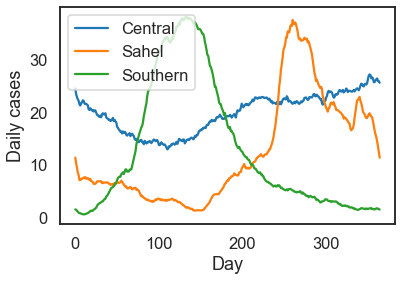

In [62]:
for a, sdf in df_save.groupby("archetype"):
    plt.plot(sdf["day"], sdf["cases"],label=a)
plt.legend()
plt.ylabel("Daily cases")
plt.xlabel("Day")

In [85]:
month_days = 30.417/2. + np.array([    0.0,
    30.417,
    60.833,
    91.25,
    121.667,
    152.083,
    182.5,
    212.917,
    243.333,
    273.75,
    304.167,
    334.583])

meta NOT subset; don't know how to subset; dropped


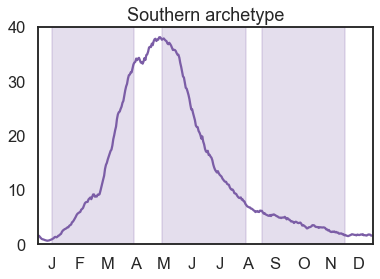

In [95]:
# School calendars:
archetype = "Southern"
df_plot = df_save[df_save["archetype"]=="Southern"]
plt.plot(df_plot["day"], df_plot["cases"], color="#7B5DA6")

plt.axvspan(15,105, alpha=0.2, color="#7B5DA6")
plt.axvspan(135,227, alpha=0.2, color="#7B5DA6")
plt.axvspan(244,335, alpha=0.2, color="#7B5DA6")
plt.xlim([0,365])

plt.xticks(month_days)
ax = plt.gca()
ax.set_xticklabels(["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"])

plt.ylim([0,40])
plt.title("Southern archetype")
plt.savefig("calendar_southern.pdf")

meta NOT subset; don't know how to subset; dropped


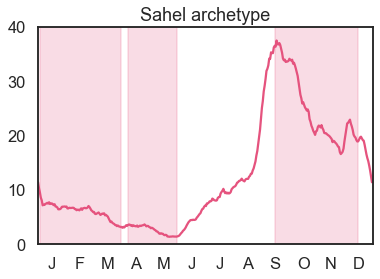

In [98]:
# School calendars:
archetype = "Sahel"
df_plot = df_save[df_save["archetype"]=="Sahel"]
plt.plot(df_plot["day"], df_plot["cases"], color="#E5537E")

plt.axvspan(2,90, alpha=0.2, color="#E5537E")
plt.axvspan(98,151, alpha=0.2, color="#E5537E")
plt.axvspan(258,349, alpha=0.2, color="#E5537E")
plt.xlim([0,365])

plt.xticks(month_days)
ax = plt.gca()
ax.set_xticklabels(["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"])

plt.ylim([0,40])
plt.title("Sahel archetype")
plt.savefig("calendar_sahel.pdf")

meta NOT subset; don't know how to subset; dropped


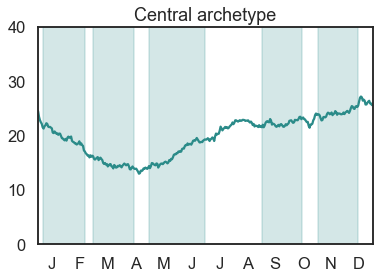

In [99]:
# School calendars:
archetype = "Central"
df_plot = df_save[df_save["archetype"]=="Central"]
plt.plot(df_plot["day"], df_plot["cases"], color="#2B8B89")

plt.axvspan(5,51, alpha=0.2, color="#2B8B89")
plt.axvspan(60,105, alpha=0.2, color="#2B8B89")
plt.axvspan(121,182, alpha=0.2, color="#2B8B89")
plt.axvspan(244,288, alpha=0.2, color="#2B8B89")
plt.axvspan(305,349, alpha=0.2, color="#2B8B89")


# t1 = np.arange(5,51, delta_time) #Jan 5-Feb 20
# t2 = np.arange(60, 105, delta_time)# Mar 1-mid Apr
# t3 = np.arange(121, 182, delta_time) # May 1 - July 1
# t4 = np.arange(244, 288, delta_time)# Sept 1- mid Oct
# t5 = np.arange(305, 349, delta_time) # Nov - mid Dec
plt.xticks(month_days)
ax = plt.gca()
ax.set_xticklabels(["J", "F", "M", "A", "M", "J", "J", "A", "S", "O", "N", "D"])

plt.xlim([0,365])
plt.ylim([0,40])
plt.title("Central archetype")
plt.savefig("calendar_central.pdf")